Perceptron is the single linear neural network that works on input, weight and output.
works with datasets that separately linearly and linear separation by network

In [4]:
import numpy as np

In [9]:
class Perceptron:
  def __init__(self, learning_rate=0.1, epochs = 100) -> None:
    self.learning_rate = learning_rate
    self.epochs = epochs
  
  def fit(self, X, y):
    self.weights = np.random.rand(X.shape[1])
    self.bias = np.random.rand(1)

    for i in range(self.epochs):
      for inputs, target in zip(X, y): # X[1, 2, 3, 4] Y[0, 1, 0, 1]
        prediction = self.predict(inputs)
        error = target - prediction
        self.weights += self.learning_rate * error * inputs
        self.bias += self.learning_rate * error
  
  def predict(self, inputs):
    weighted_sum = np.dot(inputs, self.weights) + self.bias
    return self._activation(weighted_sum)

  def _activation(self, z):
    return 1 if z >= 0 else 0

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [13]:
iris = load_iris()
X = iris.data[:, :2]
y = np.where(iris.target != 0, 0, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
perceptron = Perceptron(learning_rate=0.1, epochs=100)
perceptron.fit(X_train, y_train)

In [20]:
# Get predictions from the test set
y_pred = np.array([perceptron.predict(x) for x in X_test])

# Generate the classification report
report = classification_report(
  y_test, y_pred, target_names= ['Iris-setosa', 'Iris-other']
)

print(report)

              precision    recall  f1-score   support

 Iris-setosa       1.00      1.00      1.00        20
  Iris-other       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

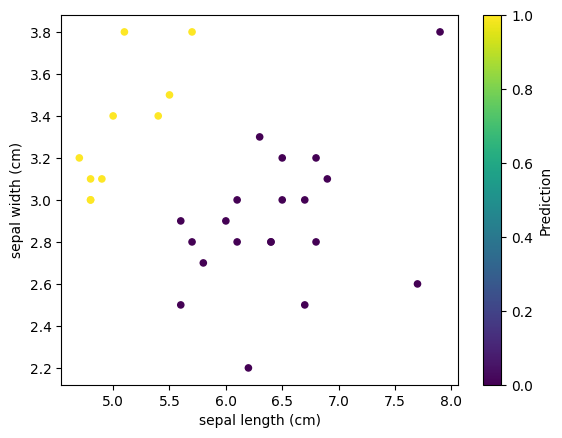

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(X_test, columns=iris.feature_names[:2])
df['Prediction'] = y_pred

df.plot.scatter(
  x='sepal length (cm)',
  y='sepal width (cm)',
  c='Prediction',
  colormap='viridis'
)